In [10]:
#pip install tensorflow


In [2]:
import tensorflow


In [3]:
#pip install keras


In [6]:
from tensorflow import keras
keras.__version__

'2.5.0'

In [8]:
pip install keras.datasets

Note: you may need to restart the kernel to use updated packages.


In [9]:
from keras.datasets import mnist

In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [24]:
network = keras.models.Sequential()
network.add(keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [27]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [28]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2587 - accuracy: 0.9248
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1033 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0673 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0487 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0370 - accuracy: 0.9885


In [29]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9793


In [30]:
print('test_acc:', test_acc)

test_acc: 0.9793000221252441


In [44]:
network.save('final_model.h5')

In [78]:
model_json = network.to_json()


In [79]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [80]:
network.save_weights("model.h5")

In [81]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [87]:
loaded_model = keras.models.model_from_json(loaded_model_json)

In [57]:
import numpy as np
import cv2


In [55]:
import os
os.sys.path

['C:\\Users\\Chiranthana',
 'C:\\Users\\Chiranthana\\anaconda3\\python38.zip',
 'C:\\Users\\Chiranthana\\anaconda3\\DLLs',
 'C:\\Users\\Chiranthana\\anaconda3\\lib',
 'C:\\Users\\Chiranthana\\anaconda3',
 '',
 'C:\\Users\\Chiranthana\\anaconda3\\lib\\site-packages',
 'C:\\Users\\Chiranthana\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\Users\\Chiranthana\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Chiranthana\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Chiranthana\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Chiranthana\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Chiranthana\\.ipython']

In [56]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [58]:
def input_prepare(img):
    img = np.asarray(img)              # convert to array 
    img = cv2.resize(img, (28, 28 ))   # resize to target shape 
    img = cv2.bitwise_not(img)         # [optional] my input was white bg, I turned it to black - {bitwise_not} turns 1's into 0's and 0's into 1's
    img = img / 255                    # normalize 
    img = img.reshape(1, 784)          # reshaping 
    return img 

In [89]:
img = cv2.imread('input.png')
orig = img.copy() # save for plotting later on 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray scaling 
img = input_prepare(img)
print(img.shape)

(1, 784)


In [90]:
import matplotlib.pyplot as plt

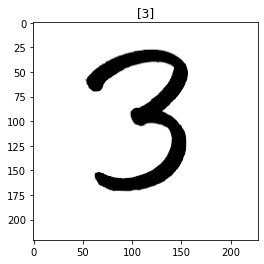

In [91]:
pred = network.predict(img)
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.title(np.argmax(pred, axis=1))
plt.show()
